# My Convex Optimization

Submit file: ["my_convex_optimization.py"]


## Introduction
Importing libraries

In [2]:
from matplotlib import pyplot as plt
import numpy as np

## Function Plot

In [2]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x


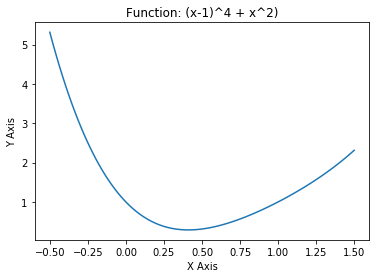

In [3]:
x = np.linspace(-0.5,1.5,100)
y = f(x)
plt.plot(x,y)
plt.title("Function: (x-1)^4 + x^2)")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

## Finding Root of Function

In [4]:
def find_root(f,a,b):
    if (f(a) * f(b) >= 0): 
        print("You have not assumed right a and b\n") 
        return
    c = a
    while( (b - a) >= 0.001):
        c = (a + b) / 2
        if (f(c) == 0):
            break
        
        if (f(a) * f(c) < 0):
            b = c
        else:
            a = c
    return c

In [5]:
root = find_root(f_prime,-5,5)
y_min = f(root)
print(root,y_min)

0.4107666015625 0.28927426187129535


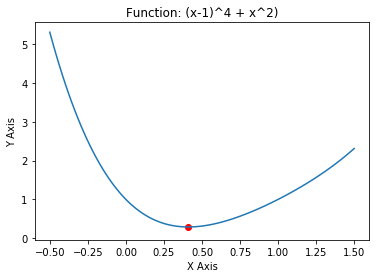

In [6]:
plt.plot(x,y)
plt.title("Function: (x-1)^4 + x^2)")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.scatter(root,y_min, color= 'red')
plt.show()

## Gradient Descent Methods

In [9]:
def gradient_descent(f, f_prime, cur_x, learning_rate = 0.1):

    precision = 0.001 #This tells us when to stop the algorithm
    previous_step_size = 1 #
    iters = 0
    while previous_step_size > precision:
        prev_x = cur_x #Store current x value in prev_x
        cur_x = cur_x - learning_rate * f_prime(prev_x) #Grad descent
        previous_step_size = abs(cur_x - prev_x) #Change in x
        iters += 1
    return cur_x,iters

start = -1
x_min,iters = gradient_descent(f, f_prime, start, 0.1)
f_min = f(x_min)

print("xmin: %0.3f, f(x_min): %0.3f" % (x_min, f_min),"Iterations:",iters)


xmin: 0.411, f(x_min): 0.289 Iterations: 10


**Question: How does the learning rate influence the efficiency of the algorithm? What happens if it is very small? What if it is very big?**

*Answer: If no learning rate is bigger number number interations will decrease,however there is a pit fall that we might skip over the local minimum. If the learning rate is smaller the it will take longer time to find the minimum, however the prericision should be be adjasted accordingly, precision must be smaller then the learning rate.*

## Simplex algorithm

*maximize   z = x + 2y
subject to
      2x + y ≤ 10
      -4x + 5y ≤ 8
      x - 2y ≤ 3
      x, y ≥ 0*

In [7]:
from scipy.optimize import linprog

def solve_linear_problem(A, b, c):
    return linprog(c, A_ub=A, b_ub=b,bounds=(0, None))

In [29]:
A = np.array([[2, 1], [-4, 5], [1, -2], [-1, 0], [0, -1]])
b = np.array([10, 8, 3, 0, 0])
c = np.array([-1,-2])
result = solve_linear_problem(A, b, c)
print("The optimal value is:", round(result['fun'] * (-1),2), " and is reached for x = ", result['x'])

The optimal value is: 11.0  and is reached for x =  [3. 4.]
